In [25]:
pip install pandas seaborn scikit-learn matplotlib imblearn

In [26]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [28]:
import pandas as pd

train_data = pd.read_csv('../dataset/train.csv')
test_data = pd.read_csv('../dataset/test.csv')

# Train Dataset
print("Train Dataset Overview:")
print(train_data.info())

print("\nTrain Unique Values in Each Column:")
unique_values = train_data.nunique()
print(unique_values)

print("\nTrain Sample Data:")
print(train_data.head())

numerical_columns_train = train_data.select_dtypes(include=['float64', 'int64'])

print("\nTrain Statistical Analysis of Numerical Columns:")
stats = numerical_columns_train.describe(percentiles=[0.25, 0.5, 0.75]).T
stats['std'] = numerical_columns_train.std()
print(stats)

stats.to_csv('numerical_column_stats_train.csv', index=True)


# Test Dataset
print("Test Dataset Overview:")
print(test_data.info())

print("\nTest Unique Values in Each Column:")
unique_values = test_data.nunique()
print(unique_values)

print("\nTest Sample Data:")
print(test_data.head())

numerical_columns_test = test_data.select_dtypes(include=['float64', 'int64'])

print("\nTest Statistical Analysis of Numerical Columns:")
stats = numerical_columns_test.describe(percentiles=[0.25, 0.5, 0.75]).T
stats['std'] = numerical_columns_test.std()
print(stats)

stats.to_csv('numerical_column_stats_test.csv', index=True)

Train Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6256 entries, 0 to 6255
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           6256 non-null   int64  
 1   Address         6256 non-null   object 
 2   Possesion       6256 non-null   object 
 3   Furnishing      6256 non-null   object 
 4   Buildup_area    6256 non-null   float64
 5   Carpet_area     6256 non-null   float64
 6   Bathrooms       6256 non-null   float64
 7   Property_age    6256 non-null   int64  
 8   Parking         6256 non-null   int64  
 9   Price           6256 non-null   int64  
 10  Brokerage       6256 non-null   float64
 11  Floor           6256 non-null   float64
 12  Per_sqft_price  6256 non-null   float64
 13  BHK             6256 non-null   float64
 14  Total_bedrooms  6256 non-null   float64
dtypes: float64(8), int64(4), object(3)
memory usage: 733.3+ KB
None

Train Unique Values in Each Column


Correlation with Target Variable:
index             0.053619
Buildup_area      0.840860
Carpet_area       0.895774
Bathrooms         0.359334
Property_age      0.069613
Parking           0.509753
Price             1.000000
Brokerage         0.671218
Floor             0.293367
Per_sqft_price    0.751061
BHK               0.681427
Total_bedrooms    0.670491
Name: Price, dtype: float64

Columns to Drop Due to Weak Correlation:
Index(['index', 'Property_age'], dtype='object')
Column 'index' was dropped due to weak correlation (0.05) with 'Price'.
Column 'Property_age' was dropped due to weak correlation (0.07) with 'Price'.

Processed train data saved to: dropped_cols_train_data.csv

Processed test data saved to: dropped_cols_test_data.csv


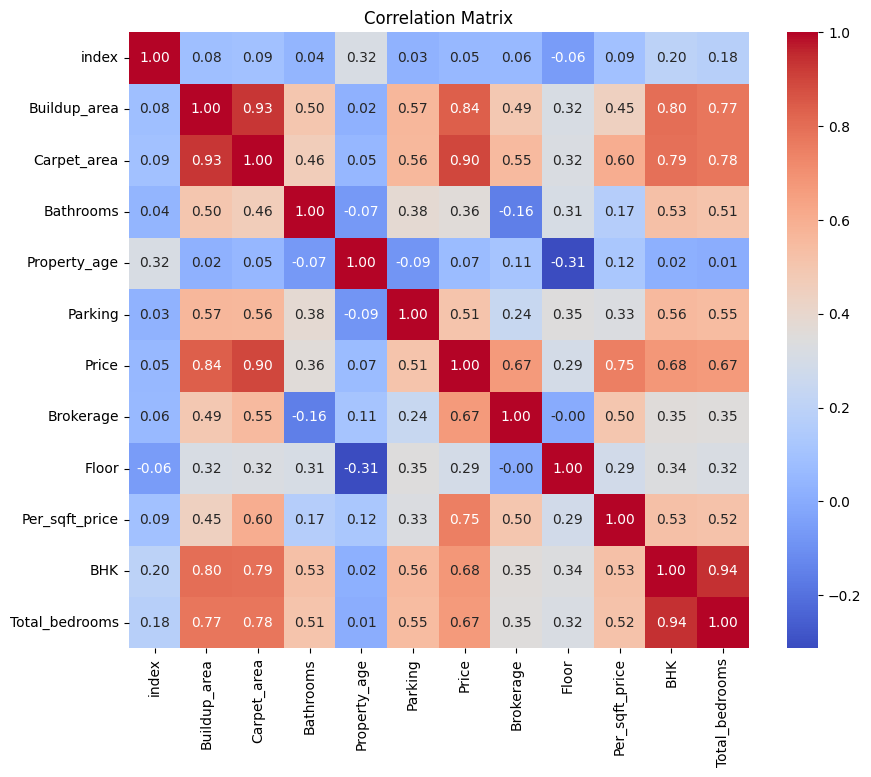

In [29]:
numerical_data = train_data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_data.corr()

if 'Price' in correlation_matrix.columns:
    target_correlation = correlation_matrix['Price']
    print("\nCorrelation with Target Variable:")
    print(target_correlation)

    weak_correlation_columns = target_correlation[(target_correlation > -0.1) & (target_correlation < 0.1)].index
    print("\nColumns to Drop Due to Weak Correlation:")
    print(weak_correlation_columns)

    train_data = train_data.drop(columns=weak_correlation_columns)
    test_data = test_data.drop(columns=weak_correlation_columns)
    
    train_data = train_data.drop(columns='Possesion')
    test_data = test_data.drop(columns='Possesion')

    for column in weak_correlation_columns:
        print(f"Column '{column}' was dropped due to weak correlation ({target_correlation[column]:.2f}) with 'Price'.")
else:
    print("Target variable 'Price' is not found in the correlation matrix.")

dropped_cols_data_path_train = "dropped_cols_train_data.csv"
dropped_cols_data_path_test = "dropped_cols_test_data.csv"
train_data.to_csv(dropped_cols_data_path_train, index=False)
test_data.to_csv(dropped_cols_data_path_test, index=False)
print(f"\nProcessed train data saved to: {dropped_cols_data_path_train}")
print(f"\nProcessed test data saved to: {dropped_cols_data_path_test}")

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")

output_path = "Plots/correlation_matrix.png"
plt.savefig(output_path, bbox_inches='tight')
plt.show()

In [30]:
# Here, we assume that all the columns with 'object' data type are categorical columns, including "Address"
categorical_columns = train_data.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

label_encoder = LabelEncoder()

for col in categorical_columns:
    train_data[col] = label_encoder.fit_transform(train_data[col])
    test_data[col] = label_encoder.fit_transform(test_data[col])
    print(f"Column '{col}' encoded with Label Encoding.")

print("\nTransformed Dataset (with Encoded Categorical Columns):")
print(train_data.head())

Categorical Columns: Index(['Address', 'Furnishing'], dtype='object')
Column 'Address' encoded with Label Encoding.
Column 'Furnishing' encoded with Label Encoding.

Transformed Dataset (with Encoded Categorical Columns):
   Address  Furnishing  Buildup_area  Carpet_area  Bathrooms  Parking  \
0      183           1         615.0   508.043150        1.0        0   
1       15           1        1200.0   724.772558        3.0        1   
2     3106           1        3300.0  2300.000000        5.0        3   
3     1478           2         800.0   642.570682        1.0        1   
4      305           1        2000.0  1602.321210        4.0        2   

       Price   Brokerage  Floor  Per_sqft_price  BHK  Total_bedrooms  
0   14500000  14500000.0    7.0         23580.0  2.0             2.0  
1   18500000  18500000.0   13.0         15420.0  2.0             2.0  
2  125000000   1250000.0   32.0         37880.0  4.0             4.0  
3   16000000  16000000.0    4.0         20000.0  2.0   

In [31]:
# Unscaled data
X_unscaled = train_data.drop(columns=['Price'])
y_unscaled = train_data['Price']

X_unscaled_test = test_data.drop(columns=['Price'])
y_unscaled_test = test_data['Price']

# Train Decision Tree on unscaled data
model_unscaled = DecisionTreeRegressor(random_state=42)
model_unscaled.fit(X_unscaled, y_unscaled)
y_pred_unscaled = model_unscaled.predict(X_unscaled_test)

mse_unscaled = mean_squared_error(y_unscaled_test, y_pred_unscaled)
print(f"\nMean Squared Error (Unscaled Data): {mse_unscaled}")

r2_unscaled = r2_score(y_unscaled_test, y_pred_unscaled)
print(f"R² Score (Unscaled Data): {r2_unscaled}")

mae_unscaled = mean_absolute_error(y_unscaled_test, y_pred_unscaled)
print(f"Mean Absolute Error (Unscaled Data): {mae_unscaled}")



# Scaled data
columns_to_exclude = ['Price', 'Address', 'Furnishing']
numerical_columns_to_scale = [col for col in train_data.select_dtypes(include=['float64', 'int64']).columns if col not in columns_to_exclude]

y_train = train_data['Price']
y_test = test_data['Price']

# Apply StandardScaler to scale the features
scaler = StandardScaler()

X_train_scaled_numerical = scaler.fit_transform(train_data[numerical_columns_to_scale])
X_test_scaled_numerical = scaler.transform(test_data[numerical_columns_to_scale])

X_train_scaled_numerical_df = pd.DataFrame(X_train_scaled_numerical, columns=numerical_columns_to_scale)
X_test_scaled_numerical_df = pd.DataFrame(X_test_scaled_numerical, columns=numerical_columns_to_scale)

excluded_columns_train = train_data[columns_to_exclude].reset_index(drop=True)
excluded_columns_test = test_data[columns_to_exclude].reset_index(drop=True)

X_train_final = pd.concat([X_train_scaled_numerical_df, excluded_columns_train], axis=1)
X_test_final = pd.concat([X_test_scaled_numerical_df, excluded_columns_test], axis=1)

# Train Decision Tree on scaled data
model_scaled = DecisionTreeRegressor(random_state=42)
model_scaled.fit(X_train_final, y_train)
y_pred_scaled = model_scaled.predict(X_test_final)

mse_scaled = mean_squared_error(y_test, y_pred_scaled)
print(f"\nMean Squared Error (Scaled Data): {mse_scaled}")

r2_scaled = r2_score(y_test, y_pred_scaled)
print(f"R² Score (Scaled Data): {r2_scaled}")

mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
print(f"Mean Absolute Error (Scaled Data): {mae_scaled}")

X_train_final.to_csv('scaled_train_data.csv', index=False)
print("\nScaled data saved to 'scaled_train_data.csv'")

X_test_final.to_csv('scaled_test_data.csv', index=False)
print("Scaled data saved to 'scaled_test_data.csv'")


Mean Squared Error (Unscaled Data): 8049842755754.476
R² Score (Unscaled Data): 0.9931096004302916
Mean Absolute Error (Unscaled Data): 885363.1713554987

Mean Squared Error (Scaled Data): 375170371483.376
R² Score (Scaled Data): 0.999678866551227
Mean Absolute Error (Scaled Data): 45220.58823529412

Scaled data saved to 'scaled_train_data.csv'
Scaled data saved to 'scaled_test_data.csv'


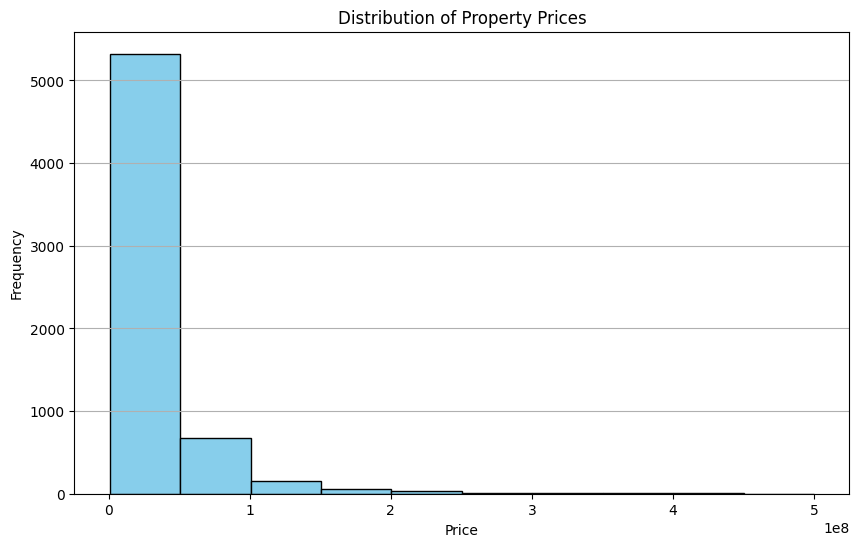

Final train and test datasets with 'Price_Category' saved successfully:
- X_train_final_with_categories.csv
- X_test_final_with_categories.csv
       Price Price_Category
0   14500000         Medium
1   18500000         Medium
2  125000000      Very High
3   16000000         Medium
4   85000000      Very High


C:\Users\vikra\AppData\Local\Temp\ipykernel_37280\2760321665.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


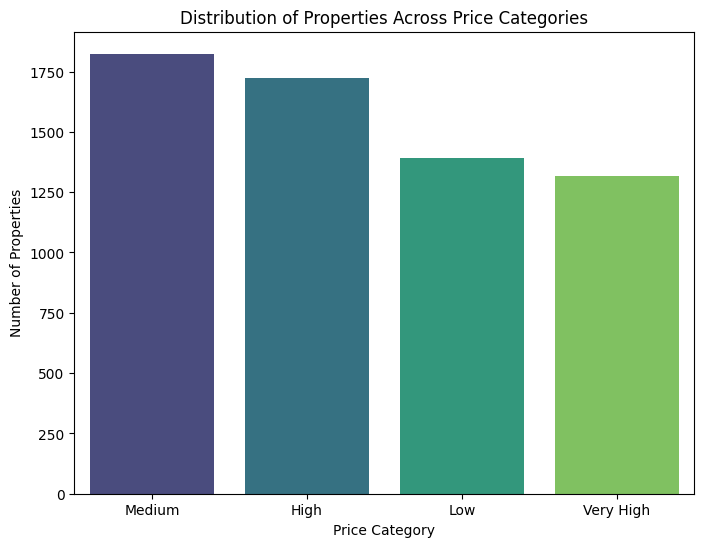


Distribution of Properties Across Price Categories:
Price_Category
Medium       1824
High         1722
Low          1391
Very High    1319
Name: count, dtype: int64


In [32]:
plt.figure(figsize=(10, 6))
plt.hist(train_data['Price'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y')

output_path = "Plots/price_distribution.png"
plt.savefig(output_path, bbox_inches='tight')
plt.show()

def categorize_price(price):
    if price < 10000000:
        return 'Low'
    elif 10000000 <= price < 20000000:
        return 'Medium'
    elif 20000000 <= price < 40000000:
        return 'High'
    else:
        return 'Very High'

X_train_final['Price_Category'] = X_train_final['Price'].apply(categorize_price)
X_test_final['Price_Category'] = X_test_final['Price'].apply(categorize_price)

X_train_final.to_csv("X_train_final_with_categories.csv", index=False)
X_test_final.to_csv("X_test_final_with_categories.csv", index=False)

print("Final train and test datasets with 'Price_Category' saved successfully:")
print("- X_train_final_with_categories.csv")
print("- X_test_final_with_categories.csv")

print(X_train_final[['Price', 'Price_Category']].head())

category_counts = X_train_final['Price_Category'].value_counts()

# Plot the distribution of price categories
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of Properties Across Price Categories')
plt.xlabel('Price Category')
plt.ylabel('Number of Properties')

output_path = "Plots/price_category_distribution.png"
plt.savefig(output_path, bbox_inches='tight')
plt.show()

print("\nDistribution of Properties Across Price Categories:")
print(category_counts)

Original Training Set Distribution (Train Data):
Price_Category
Medium       1824
High         1722
Low          1391
Very High    1319
Name: count, dtype: int64

Distribution After Random Undersampling (Train Data):
Price_Category
High         1319
Low          1319
Medium       1319
Very High    1319
Name: count, dtype: int64

Distribution After Random Oversampling (Train Data):
Price_Category
Medium       1824
Very High    1824
Low          1824
High         1824
Name: count, dtype: int64


C:\Users\vikra\AppData\Local\Temp\ipykernel_37280\1334085866.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_train_under.value_counts().index, y=y_train_under.value_counts().values, palette='viridis')


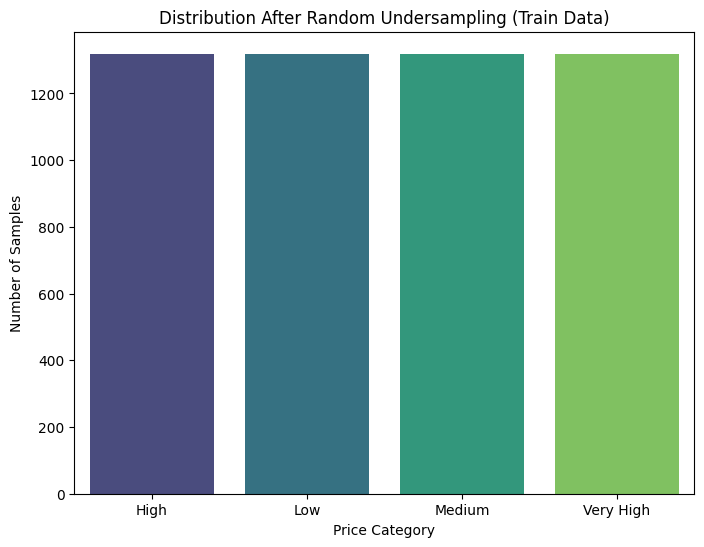

C:\Users\vikra\AppData\Local\Temp\ipykernel_37280\1334085866.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_train_over.value_counts().index, y=y_train_over.value_counts().values, palette='viridis')


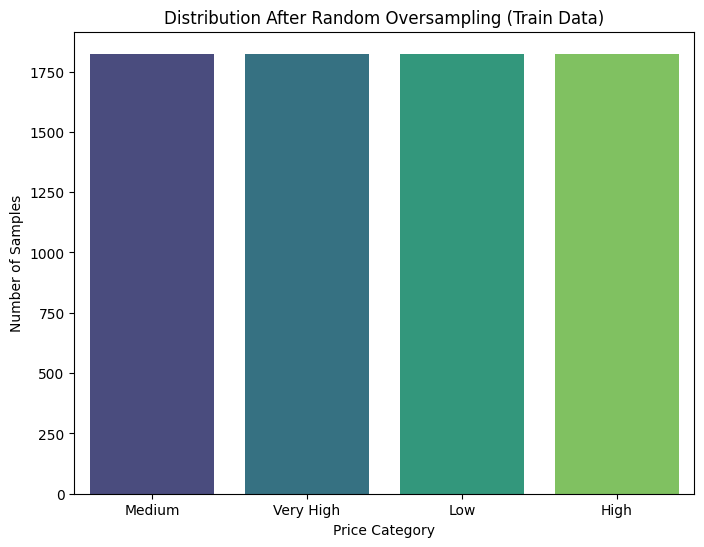

Original Training Set Distribution (Test Data):
Price_Category
High         424
Medium       419
Low          376
Very High    345
Name: count, dtype: int64

Distribution After Random Undersampling (Test Data):
Price_Category
High         345
Low          345
Medium       345
Very High    345
Name: count, dtype: int64

Distribution After Random Oversampling (Test Data):
Price_Category
Medium       424
Very High    424
High         424
Low          424
Name: count, dtype: int64


C:\Users\vikra\AppData\Local\Temp\ipykernel_37280\1334085866.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_test_under.value_counts().index, y=y_test_under.value_counts().values, palette='viridis')


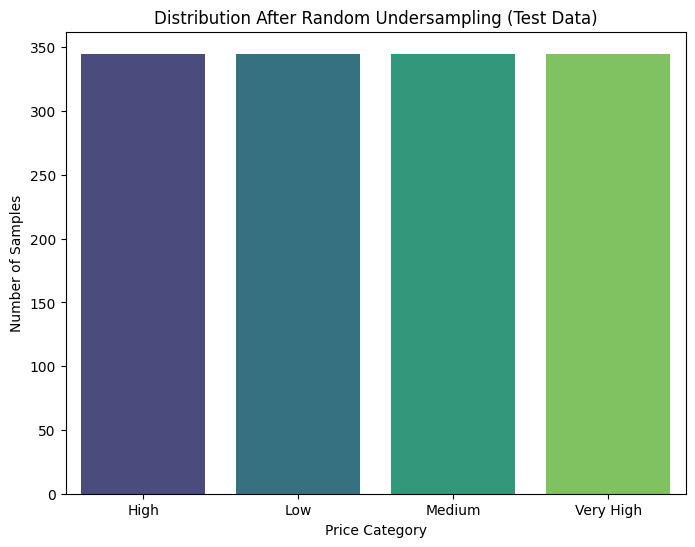

C:\Users\vikra\AppData\Local\Temp\ipykernel_37280\1334085866.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_test_over.value_counts().index, y=y_test_over.value_counts().values, palette='viridis')


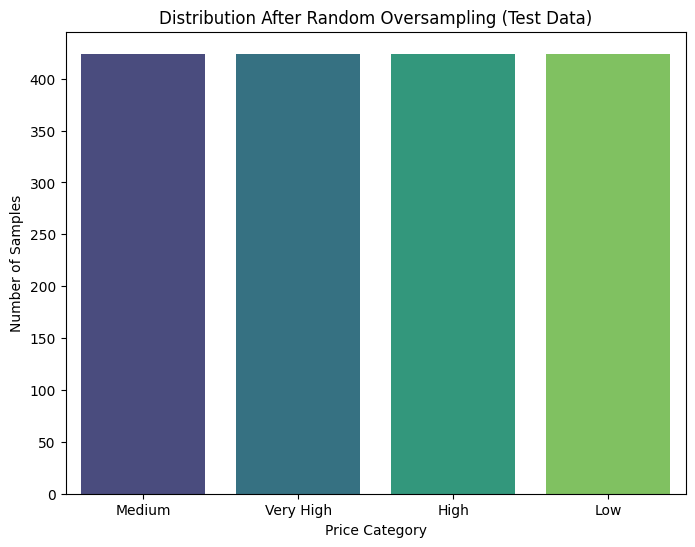

In [33]:
# Train Data
X_train = X_train_final.drop(columns=['Price_Category'])
y_train = X_train_final['Price_Category']

print("Original Training Set Distribution (Train Data):")
print(y_train.value_counts())

# Apply undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

undersampled_data = pd.concat([X_train_under, y_train_under], axis=1)
undersampled_data.to_csv('undersampled_train_data.csv', index=False)

print("\nDistribution After Random Undersampling (Train Data):")
print(y_train_under.value_counts())

# Apply oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

oversampled_data = pd.concat([X_train_over, y_train_over], axis=1)
oversampled_data.to_csv('oversampled_train_data.csv', index=False)

print("\nDistribution After Random Oversampling (Train Data):")
print(y_train_over.value_counts())

plt.figure(figsize=(8, 6))
sns.barplot(x=y_train_under.value_counts().index, y=y_train_under.value_counts().values, palette='viridis')
plt.title('Distribution After Random Undersampling (Train Data)')
plt.xlabel('Price Category')
plt.ylabel('Number of Samples')
plt.savefig("Plots/undersampling_train_data_distribution.png", bbox_inches='tight')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=y_train_over.value_counts().index, y=y_train_over.value_counts().values, palette='viridis')
plt.title('Distribution After Random Oversampling (Train Data)')
plt.xlabel('Price Category')
plt.ylabel('Number of Samples')
plt.savefig("Plots/oversampling_train_data_distribution.png", bbox_inches='tight')
plt.show()


# Test Data
X_test = X_test_final.drop(columns=['Price_Category'])
y_test = X_test_final['Price_Category']

print("Original Training Set Distribution (Test Data):")
print(y_test.value_counts())

# Apply undersampling
X_test_under, y_test_under = undersampler.fit_resample(X_test, y_test)

undersampled_data = pd.concat([X_test_under, y_test_under], axis=1)
undersampled_data.to_csv('undersampled_test_data.csv', index=False)

print("\nDistribution After Random Undersampling (Test Data):")
print(y_test_under.value_counts())

# Apply oversampling
X_test_over, y_test_over = oversampler.fit_resample(X_test, y_test)

oversampled_data = pd.concat([X_test_over, y_test_over], axis=1)
oversampled_data.to_csv('oversampled_test_data.csv', index=False)

print("\nDistribution After Random Oversampling (Test Data):")
print(y_test_over.value_counts())

plt.figure(figsize=(8, 6))
sns.barplot(x=y_test_under.value_counts().index, y=y_test_under.value_counts().values, palette='viridis')
plt.title('Distribution After Random Undersampling (Test Data)')
plt.xlabel('Price Category')
plt.ylabel('Number of Samples')
plt.savefig("Plots/undersampling_test_data_distribution.png", bbox_inches='tight')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=y_test_over.value_counts().index, y=y_test_over.value_counts().values, palette='viridis')
plt.title('Distribution After Random Oversampling (Test Data)')
plt.xlabel('Price Category')
plt.ylabel('Number of Samples')
plt.savefig("Plots/oversampling_test_data_distribution.png", bbox_inches='tight')
plt.show()


R2 Score: 0.9919688927917253

Mean Squared Error (Tuned Model): 9382496548593.35
Decision Tree Depth: 23
Number of Leaves: 3526


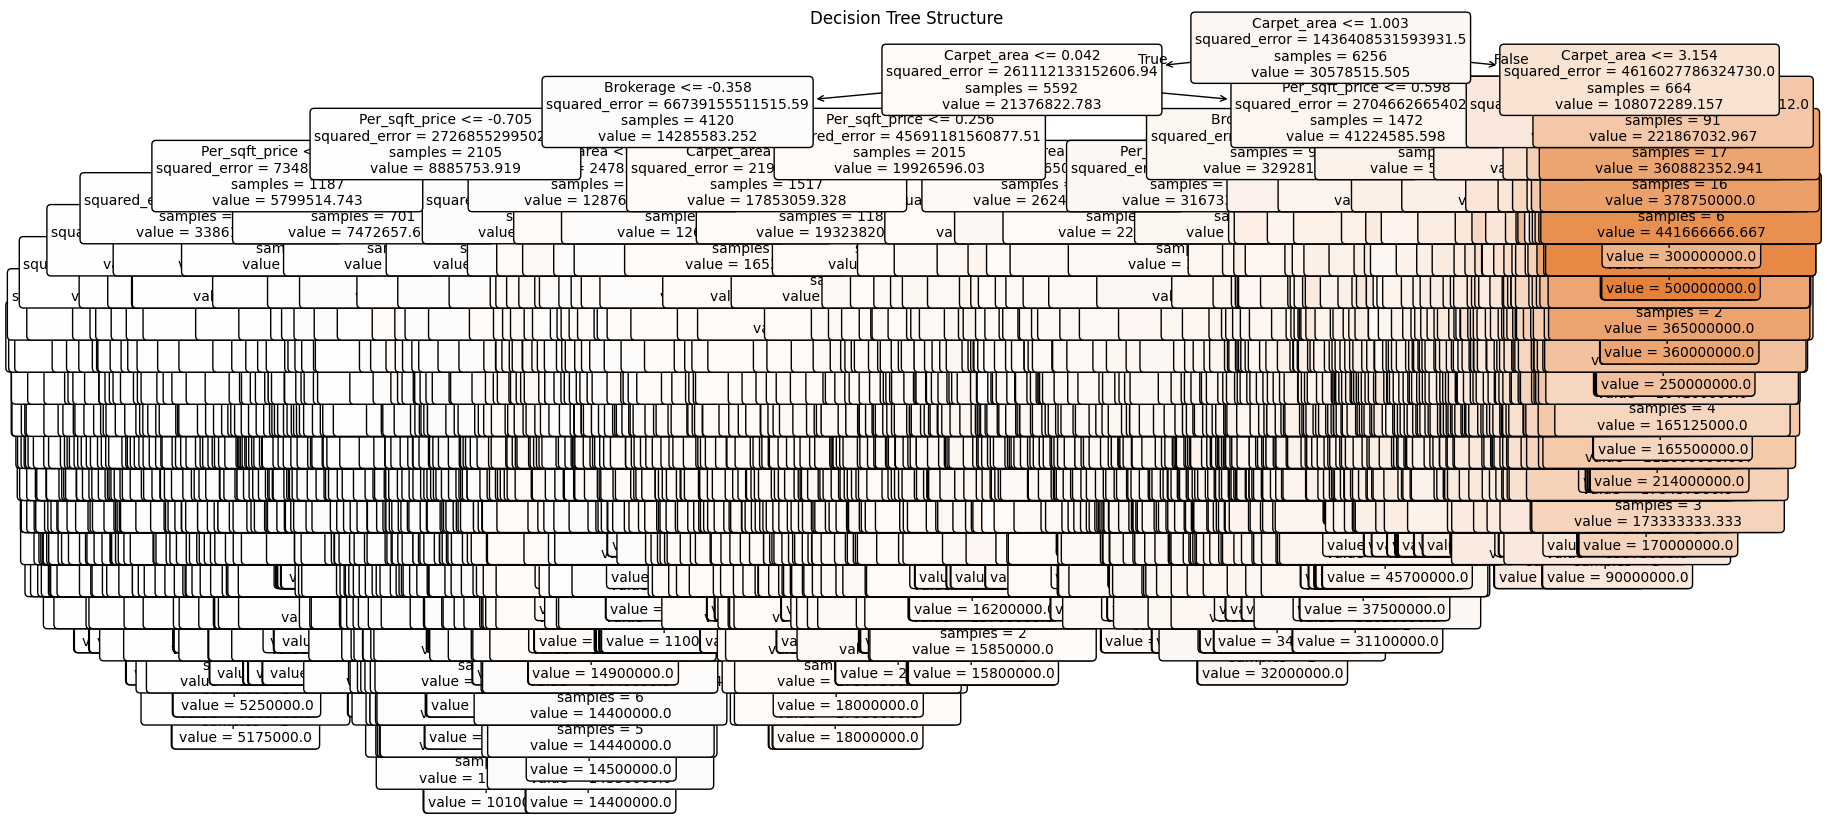

In [34]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import os

os.makedirs("Plots", exist_ok=True)

train_data = pd.read_csv('X_train_final_with_categories.csv')
test_data = pd.read_csv('X_test_final_with_categories.csv')
# train_data = pd.read_csv('../Q2/undersampled_train_data.csv')
# test_data = pd.read_csv('../Q2/undersampled_test_data.csv')
# train_data = pd.read_csv('../Q2/oversampled_train_data.csv')
# test_data = pd.read_csv('../Q2/oversampled_test_data.csv')

X_train = train_data.drop(columns=['Price', 'Price_Category'])
y_train = train_data['Price']

X_test = test_data.drop(columns=['Price', 'Price_Category'])
y_test = test_data['Price']

# Training Decision Tree on processed data
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\nR2 Score: {r2}")
print(f"\nMean Squared Error (Tuned Model): {mse}")

print(f"Decision Tree Depth: {model.get_depth()}")
print(f"Number of Leaves: {model.get_n_leaves()}")

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Structure")

output_path = "Plots/decision_tree_structure.png"
plt.savefig(output_path, bbox_inches='tight')
plt.show()

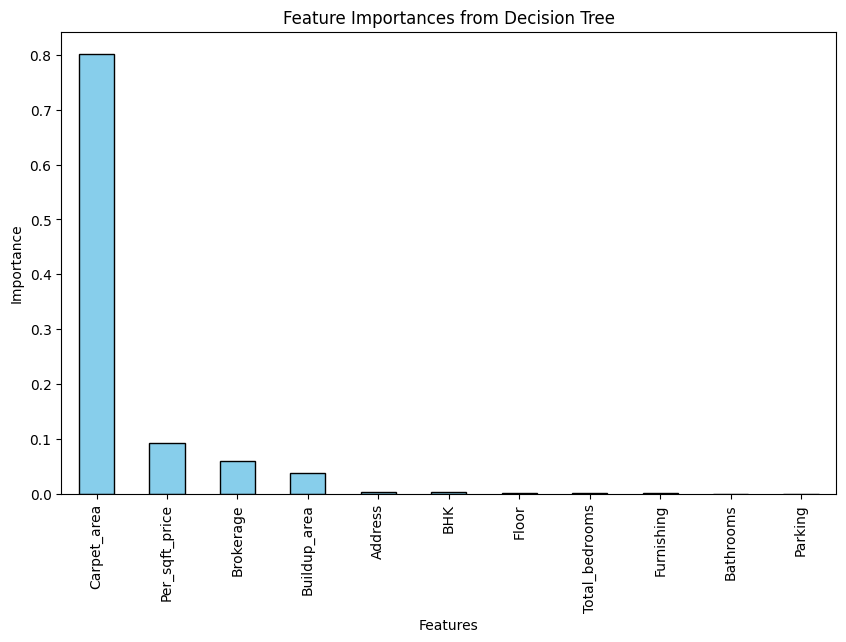

In [35]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import os

os.makedirs("Plots", exist_ok=True)

train_data = pd.read_csv('X_train_final_with_categories.csv')
# train_data = pd.read_csv('../Q2/undersampled_train_data.csv')
# train_data = pd.read_csv('../Q2/oversampled_train_data.csv')

X_train = train_data.drop(columns=['Price', 'Price_Category'])
y_train = train_data['Price']

# Training Decision Tree on processed data
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Extract feature importances from the trained Decision Tree model
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)

plt.figure(figsize=(10, 6))
feature_importances.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Feature Importances from Decision Tree")
plt.xlabel("Features")
plt.ylabel("Importance")

output_path = "Plots/feature_importances.png"
plt.savefig(output_path, bbox_inches='tight')
plt.show()

In [36]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

train_data = pd.read_csv('X_train_final_with_categories.csv')
test_data = pd.read_csv('X_test_final_with_categories.csv')
# train_data = pd.read_csv('../Q2/undersampled_train_data.csv')
# test_data = pd.read_csv('../Q2/undersampled_test_data.csv')
# train_data = pd.read_csv('../Q2/oversampled_train_data.csv')
# test_data = pd.read_csv('../Q2/oversampled_test_data.csv')

X_train = train_data.drop(columns=['Price', 'Price_Category'])
y_train = train_data['Price']

X_test = test_data.drop(columns=['Price', 'Price_Category'])
y_test = test_data['Price']

# Hyperparameter Optimization using Grid Search

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2']
}

# Training Decision Tree on processed data
model = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters from Grid Search:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\nR2 Score: {r2}")
print(f"Mean Squared Error (Tuned Model): {mse}")

Best Parameters from Grid Search:
{'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}

R2 Score: 0.9912876315716624
Mean Squared Error (Tuned Model): 10178393164111.604


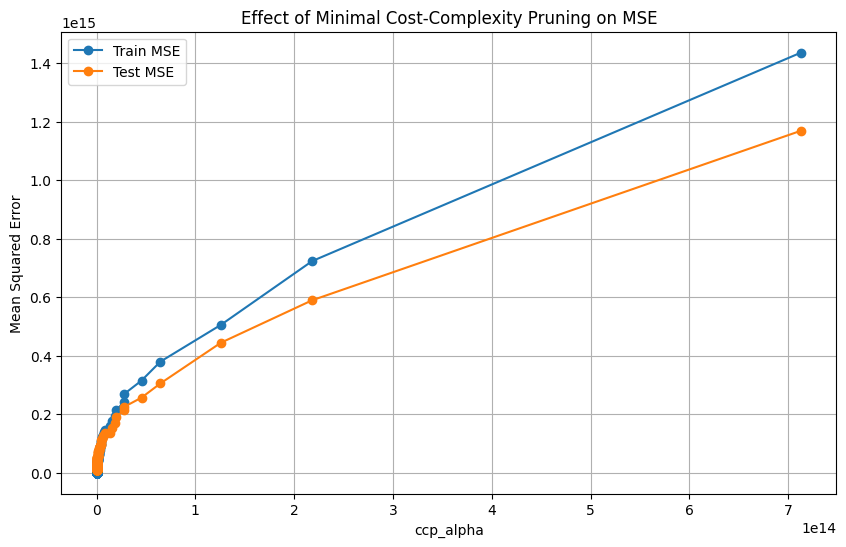

Optimal ccp_alpha: 42035836.073539406
Pruned Model R2 Score: 0.9912873869800602
Pruned Model Mean Squared Error: 10178678912988.328


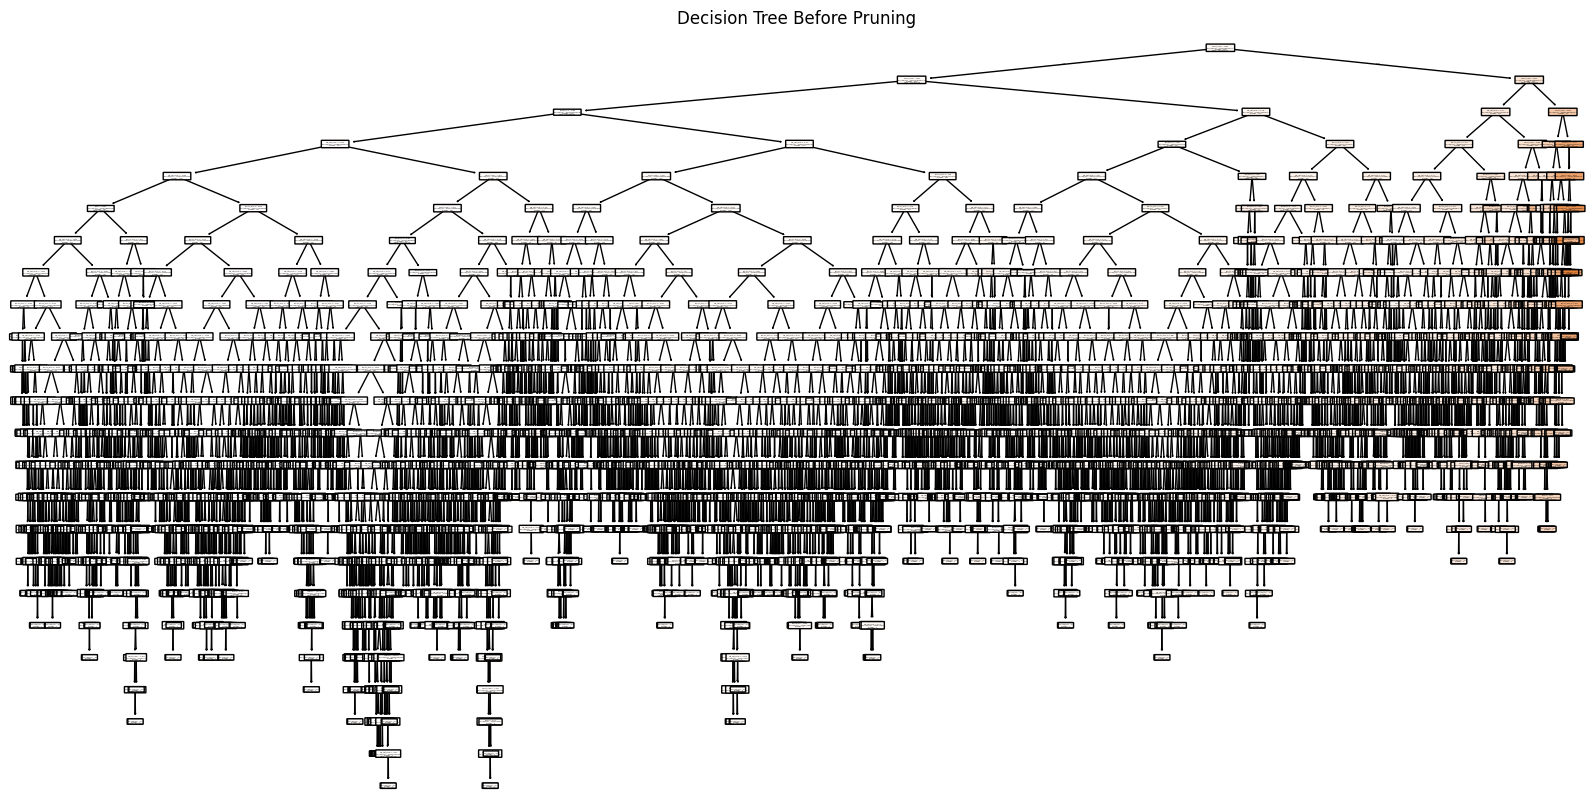

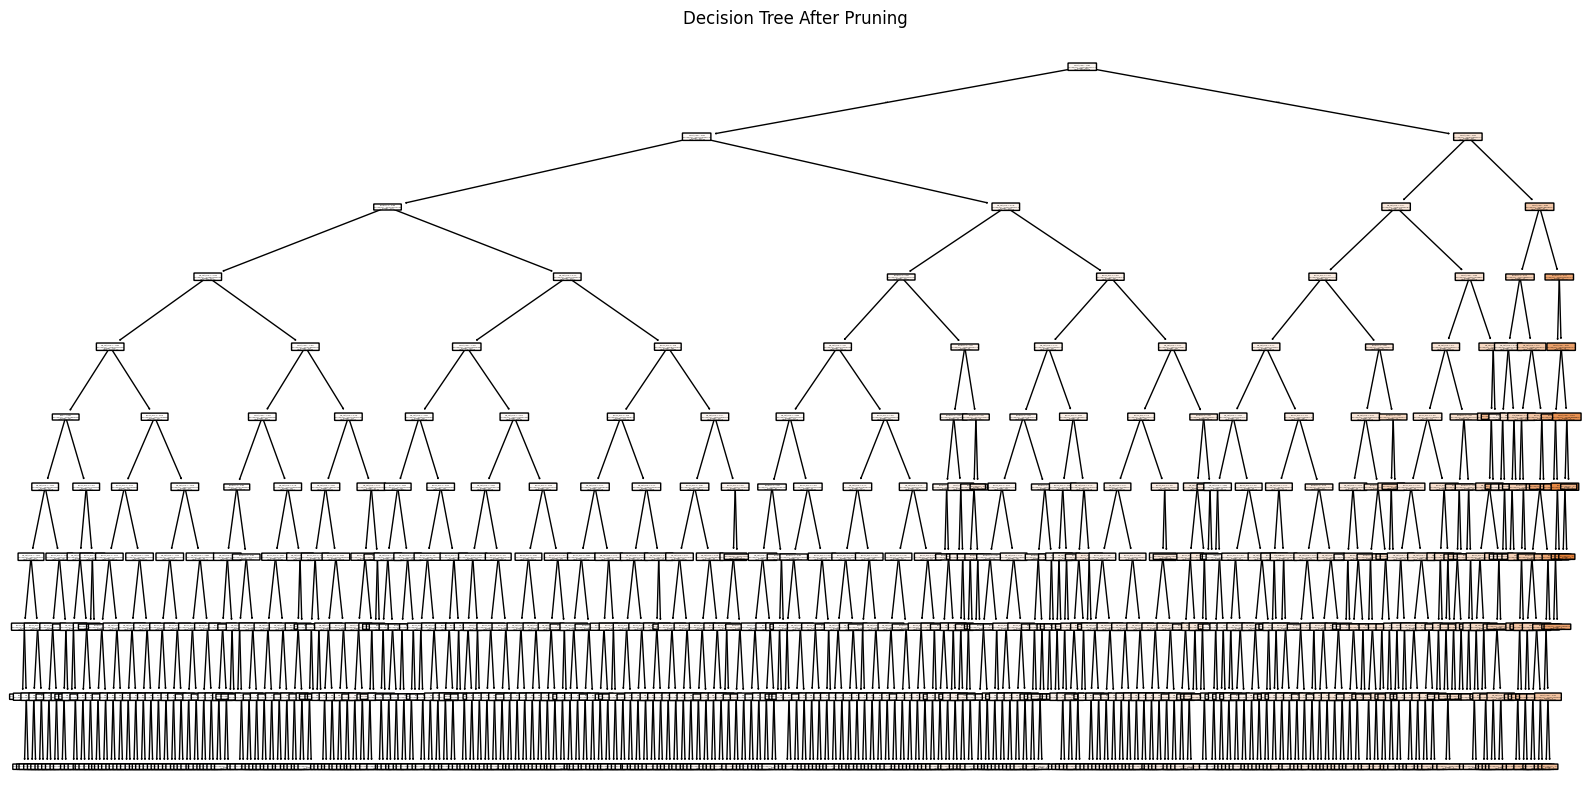

In [37]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import os

os.makedirs("Plots", exist_ok=True)

train_data = pd.read_csv('X_train_final_with_categories.csv')
test_data = pd.read_csv('X_test_final_with_categories.csv')
# train_data = pd.read_csv('../Q2/undersampled_train_data.csv')
# test_data = pd.read_csv('../Q2/undersampled_test_data.csv')
# train_data = pd.read_csv('../Q2/oversampled_train_data.csv')
# test_data = pd.read_csv('../Q2/oversampled_test_data.csv')

X_train = train_data.drop(columns=['Price', 'Price_Category'])
y_train = train_data['Price']

X_test = test_data.drop(columns=['Price', 'Price_Category'])
y_test = test_data['Price']

# Training Decision Tree on processed data using the Best Hyperparameters found in 2b
model = DecisionTreeRegressor(
    random_state=42,
    max_depth=None,
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=2
)
model.fit(X_train, y_train)

# Get effective alphas and corresponding total leaf impurities for pruning
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

# Train a series of Decision Trees with different ccp_alpha values
models = []
train_mse = []
test_mse = []

for alpha in ccp_alphas:
    pruned_model = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    pruned_model.fit(X_train, y_train)
    models.append(pruned_model)
    train_mse.append(mean_squared_error(y_train, pruned_model.predict(X_train)))
    test_mse.append(mean_squared_error(y_test, pruned_model.predict(X_test)))

# Plot training and testing errors vs ccp_alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_mse, label='Train MSE', marker='o')
plt.plot(ccp_alphas, test_mse, label='Test MSE', marker='o')
plt.xlabel('ccp_alpha')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Minimal Cost-Complexity Pruning on MSE')
plt.legend()
plt.grid()

output_path = "Plots/pruning_effect_mse_scores.png"
plt.savefig(output_path, bbox_inches='tight')
plt.show()

# Select the best tree (minimum testing error)
optimal_alpha = ccp_alphas[test_mse.index(min(test_mse))]
print(f"Optimal ccp_alpha: {optimal_alpha}")

# Retrain the Tree with Optimal ccp_alpha
pruned_model = DecisionTreeRegressor(
    random_state=42,
    max_depth=10,
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=5,
    ccp_alpha=optimal_alpha
)
pruned_model.fit(X_train, y_train)

y_pred = pruned_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
final_mse = mean_squared_error(y_test, y_pred)

print(f"Pruned Model R2 Score: {r2}")
print(f"Pruned Model Mean Squared Error: {final_mse}")

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X_train.columns, rounded=True)
plt.title("Decision Tree Before Pruning")

output_path = "Plots/unpruned_decision_tree.png"
plt.savefig(output_path, bbox_inches='tight')
# plt.show()

plt.figure(figsize=(20, 10))
plot_tree(pruned_model, filled=True, feature_names=X_train.columns, rounded=True)
plt.title("Decision Tree After Pruning")

output_path = "Plots/pruned_decision_tree.png"
plt.savefig(output_path, bbox_inches='tight')
# plt.show()

Cross-Validation MSE Scores: [3.72729614e+13 5.57853559e+13 5.85040410e+13 9.90709181e+13
 7.24237963e+13]
Mean CV MSE: 64611414559123.35


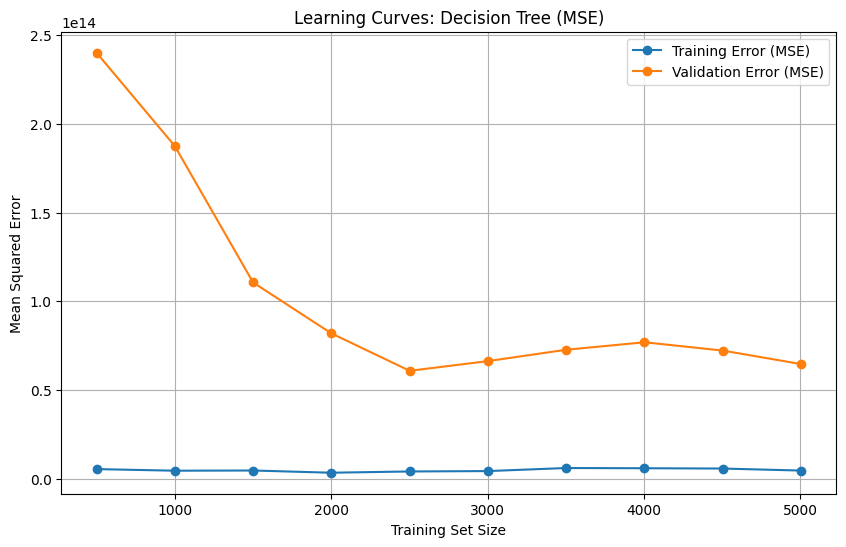

Test R^2 Score: 0.9912873869800602
Test Mean Squared Error: 10178678912988.328


In [38]:
import pandas as pd
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import os

os.makedirs("Plots", exist_ok=True)

train_data = pd.read_csv('X_train_final_with_categories.csv')
test_data = pd.read_csv('X_test_final_with_categories.csv')
# train_data = pd.read_csv('../Q2/undersampled_train_data.csv')
# test_data = pd.read_csv('../Q2/undersampled_test_data.csv')
# train_data = pd.read_csv('../Q2/oversampled_train_data.csv')
# test_data = pd.read_csv('../Q2/oversampled_test_data.csv')

X_train = train_data.drop(columns=['Price', 'Price_Category'])
y_train = train_data['Price']

X_test = test_data.drop(columns=['Price', 'Price_Category'])
y_test = test_data['Price']

# Training Decision Tree on processed data using the Best Hyperparameters found in 2b
# `ccp_alpha` = 42035836.073539406 is the best hyperparameter
model = DecisionTreeRegressor(
    random_state=42,
    max_depth=10,
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=5,
    ccp_alpha=42035836.073539406
)
model.fit(X_train, y_train)

# Perform 5-fold cross-validation
# We use Negative MSE as the scoring metric
cv_mse = cross_val_score(
    model,
    X_train,
    y_train,
    cv=5,
    scoring='neg_mean_squared_error'
)
cv_mse = -cv_mse
print("Cross-Validation MSE Scores:", cv_mse)
print("Mean CV MSE:", np.mean(cv_mse))

# Implement Learning Curves
train_sizes, train_scores, validation_scores = learning_curve(
    model,
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)

train_errors = -train_scores.mean(axis=1)
validation_errors = -validation_scores.mean(axis=1)

# Plot Learning Curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label="Training Error (MSE)", marker="o")
plt.plot(train_sizes, validation_errors, label="Validation Error (MSE)", marker="o")
plt.title("Learning Curves: Decision Tree (MSE)")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid()

output_path = "Plots/learning_curves_decision_tree_mse.png"
plt.savefig(output_path, bbox_inches='tight')
plt.show()

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Test R^2 Score: {r2}")
print(f"Test Mean Squared Error: {mse}")

In [39]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import os

os.makedirs("Plots", exist_ok=True)

train_data = pd.read_csv('X_train_final_with_categories.csv')
test_data = pd.read_csv('X_test_final_with_categories.csv')
# train_data = pd.read_csv('../Q2/undersampled_train_data.csv')
# test_data = pd.read_csv('../Q2/undersampled_test_data.csv')
# train_data = pd.read_csv('../Q2/oversampled_train_data.csv')
# test_data = pd.read_csv('../Q2/oversampled_test_data.csv')

X_train = train_data.drop(columns=['Price', 'Price_Category'])
y_train = train_data['Price']

X_test = test_data.drop(columns=['Price', 'Price_Category'])
y_test = test_data['Price']

# Training Decision Tree on processed data using the Best Hyperparameters found in 2b
# `ccp_alpha` = 42035836.073539406 is the best hyperparameter
model = DecisionTreeRegressor(
    random_state=42,
    max_depth=10,
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=5,
    ccp_alpha=42035836.073539406
)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("Train Performance:")
print(f"  R² Score: {r2_train:.4f}")
print(f"  Mean Squared Error: {mse_train:.4f}")
print(f"  Mean Absolute Error: {mae_train:.4f}")

print("\nTest Performance:")
print(f"  R² Score: {r2_test:.4f}")
print(f"  Mean Squared Error: {mse_test:.4f}")
print(f"  Mean Absolute Error: {mae_test:.4f}")

Train Performance:
  R² Score: 0.9965
  Mean Squared Error: 4991623120000.7100
  Mean Absolute Error: 918682.1690

Test Performance:
  R² Score: 0.9913
  Mean Squared Error: 10178678912988.3281
  Mean Absolute Error: 1413558.1378


Training Residuals Summary:
count    6.256000e+03
mean    -4.287419e-11
std      2.234373e+06
min     -8.500000e+07
25%     -5.260870e+05
50%      0.000000e+00
75%      5.041054e+05
max      8.500000e+07
Name: Price, dtype: float64

Test Residuals Summary:
count    1.564000e+03
mean     1.479054e+05
std      3.187993e+06
min     -2.930000e+07
25%     -6.505795e+05
50%      1.697956e+04
75%      7.002101e+05
max      5.168750e+07
Name: Price, dtype: float64


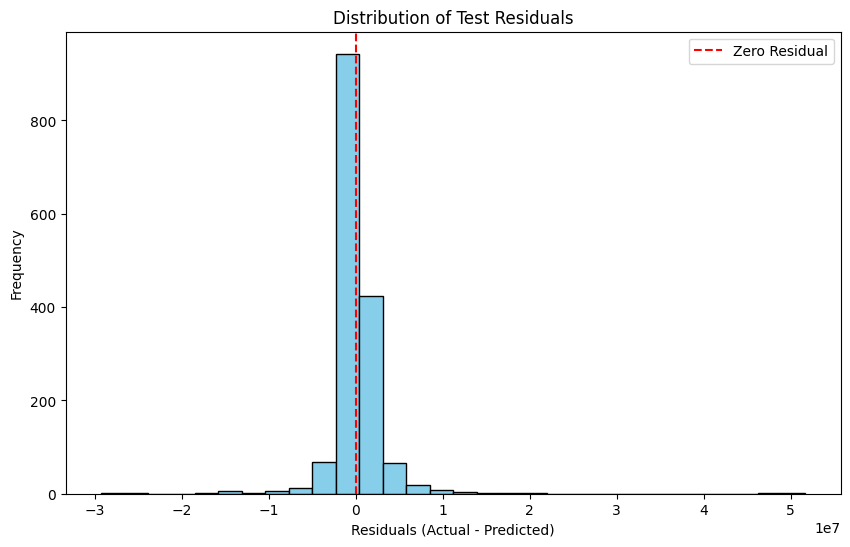

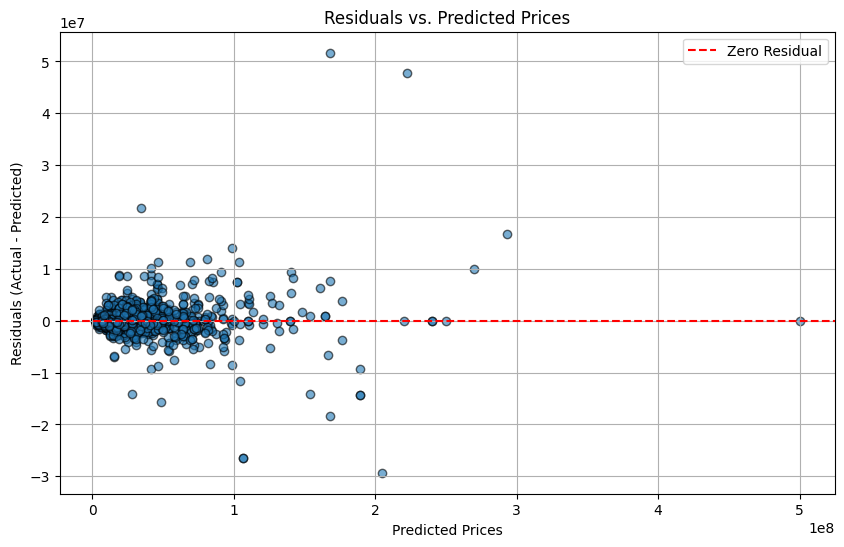

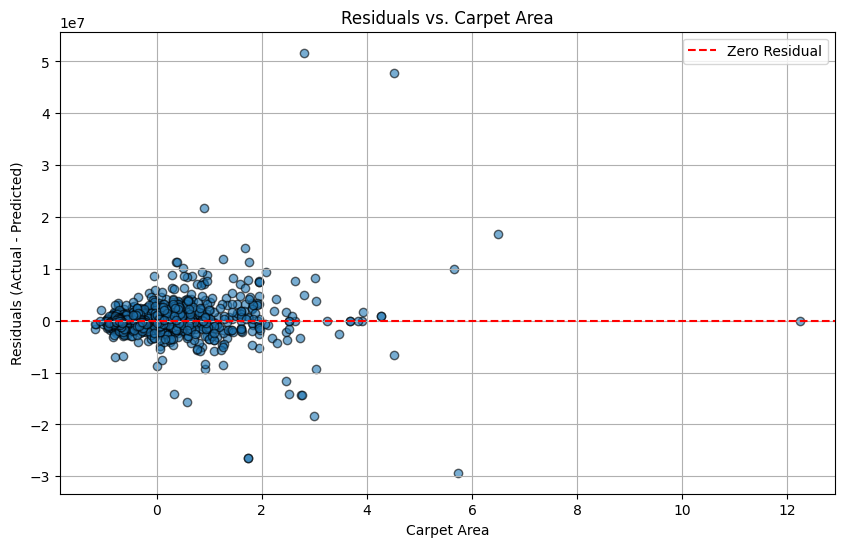

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import os

os.makedirs("Plots", exist_ok=True)

train_data = pd.read_csv('X_train_final_with_categories.csv')
test_data = pd.read_csv('X_test_final_with_categories.csv')
# train_data = pd.read_csv('../Q2/undersampled_train_data.csv')
# test_data = pd.read_csv('../Q2/undersampled_test_data.csv')
# train_data = pd.read_csv('../Q2/oversampled_train_data.csv')
# test_data = pd.read_csv('../Q2/oversampled_test_data.csv')

X_train = train_data.drop(columns=['Price', 'Price_Category'])
y_train = train_data['Price']

X_test = test_data.drop(columns=['Price', 'Price_Category'])
y_test = test_data['Price']

# Training Decision Tree on processed data using the Best Hyperparameters found in 2b
# `ccp_alpha` = 42035836.073539406 is the best hyperparameter
model = DecisionTreeRegressor(
    random_state=42,
    max_depth=10,
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=5,
    ccp_alpha=42035836.073539406
)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

print("Training Residuals Summary:")
print(train_residuals.describe())

print("\nTest Residuals Summary:")
print(test_residuals.describe())

plt.figure(figsize=(10, 6))
plt.hist(test_residuals, bins=30, color='skyblue', edgecolor='black')
plt.axvline(0, color='red', linestyle='--', label='Zero Residual')
plt.title("Distribution of Test Residuals")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.legend()

output_path = "Plots/distribution_of_test_residuals.png"
plt.savefig(output_path, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, test_residuals, alpha=0.6, edgecolor='black')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual')
plt.title("Residuals vs. Predicted Prices")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.legend()
plt.grid(True)

output_path = "Plots/residuals_vs_predicted_prices.png"
plt.savefig(output_path, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_test['Carpet_area'], test_residuals, alpha=0.6, edgecolor='black')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual')
plt.title("Residuals vs. Carpet Area")
plt.xlabel("Carpet Area")
plt.ylabel("Residuals (Actual - Predicted)")
plt.legend()
plt.grid(True)

output_path = "Plots/residuals_vs_carpet_size.png"
plt.savefig(output_path, bbox_inches='tight')
plt.show()

Overall Model RMSE: 3190404.1927298694

Top 3 Important Features:
 Carpet_area       0.807214
Per_sqft_price    0.092529
Brokerage         0.058926
dtype: float64


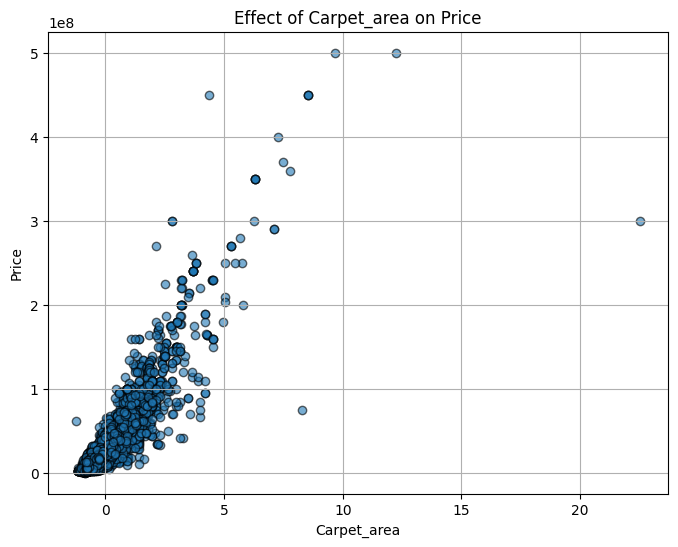

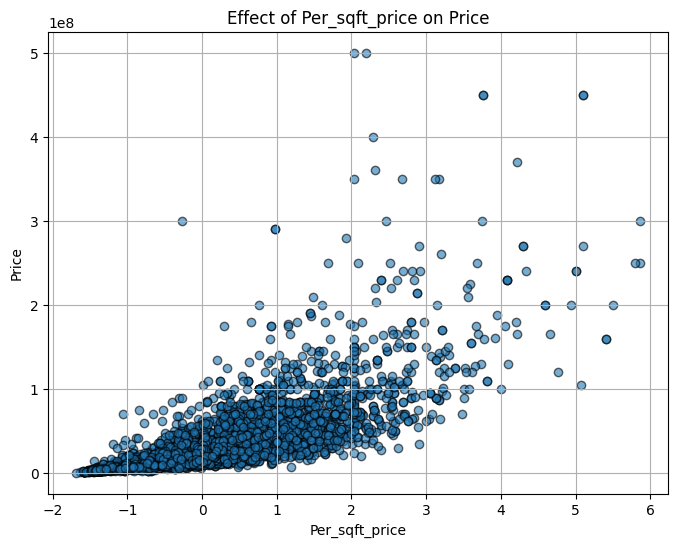

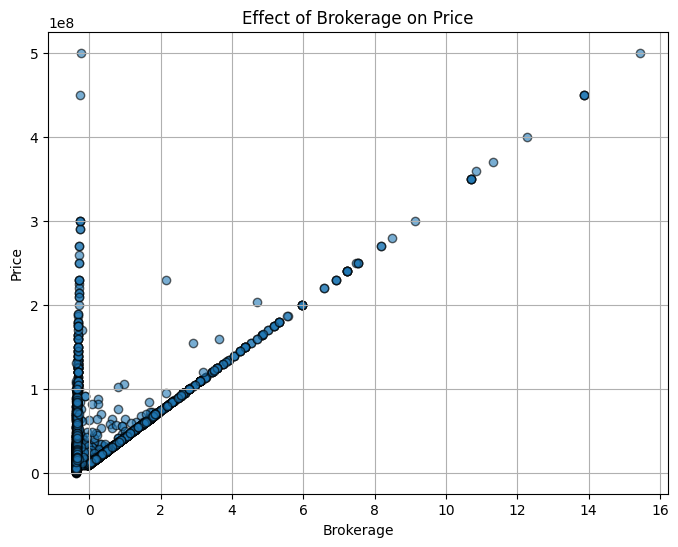

RMSE when using only Carpet_area: 26625762.94227183
RMSE when using only Per_sqft_price: 28220856.3204671
RMSE when using only Brokerage: 34796553.402905114

RMSE Results:
Overall RMSE: 3190404.1927298694
Carpet_area RMSE: 26625762.94227183
Per_sqft_price RMSE: 28220856.3204671
Brokerage RMSE: 34796553.402905114


In [41]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import os

os.makedirs("Plots", exist_ok=True)

train_data = pd.read_csv('X_train_final_with_categories.csv')
test_data = pd.read_csv('X_test_final_with_categories.csv')
# train_data = pd.read_csv('../Q2/undersampled_train_data.csv')
# test_data = pd.read_csv('../Q2/undersampled_test_data.csv')
# train_data = pd.read_csv('../Q2/oversampled_train_data.csv')
# test_data = pd.read_csv('../Q2/oversampled_test_data.csv')

X_train = train_data.drop(columns=['Price', 'Price_Category'])
y_train = train_data['Price']

X_test = test_data.drop(columns=['Price', 'Price_Category'])
y_test = test_data['Price']

# Training Decision Tree on processed data using the Best Hyperparameters found in 2b
# `ccp_alpha` = 42035836.073539406 is the best hyperparameter
model = DecisionTreeRegressor(
    random_state=42,
    max_depth=10,
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=5,
    ccp_alpha=42035836.073539406
)
model.fit(X_train, y_train)

# Overall RMSE
y_pred = model.predict(X_test)
overall_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Overall Model RMSE: {overall_rmse}")

# Identify Top 3 Important Features
feature_importances = model.feature_importances_
important_features = pd.Series(feature_importances, index=X_train.columns).sort_values(ascending=False)
top_3_features = important_features.head(3).index
print("\nTop 3 Important Features:\n", important_features.head(3))

for feature in top_3_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(train_data[feature], train_data['Price'], alpha=0.6, edgecolor='k')
    plt.title(f"Effect of {feature} on Price")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.grid()
    
    output_path = f"Plots/{feature}_vs_Price.png"
    plt.savefig(output_path, bbox_inches='tight')
    plt.show()

# Calculate RMSE for Each Feature
for feature in top_3_features:
    X_test_temp = X_test.copy()
    X_test_temp.loc[:, X_test_temp.columns != feature] = 0

    y_pred_feature = model.predict(X_test_temp)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_feature))
    print(f"RMSE when using only {feature}: {rmse}")

rmse_results = {
    'Overall RMSE': overall_rmse,
    **{f"{feature} RMSE": np.sqrt(mean_squared_error(y_test, model.predict(X_test.assign(**{col: 0 for col in X_test.columns if col != feature})))) for feature in top_3_features}
}
print("\nRMSE Results:")
for key, value in rmse_results.items():
    print(f"{key}: {value}")

Original Training Set Distribution:
2    1824
0    1722
1    1391
3    1319
Name: count, dtype: int64

SMOTE Distribution:
2    1824
3    1824
1    1824
0    1824
Name: count, dtype: int64

Imbalanced Training Set Distribution (Before ADASYN):
0    100
1    100
2    100
3     50
Name: count, dtype: int64

ADASYN Distribution:
0    100
1    100
2    100
3     96
Name: count, dtype: int64


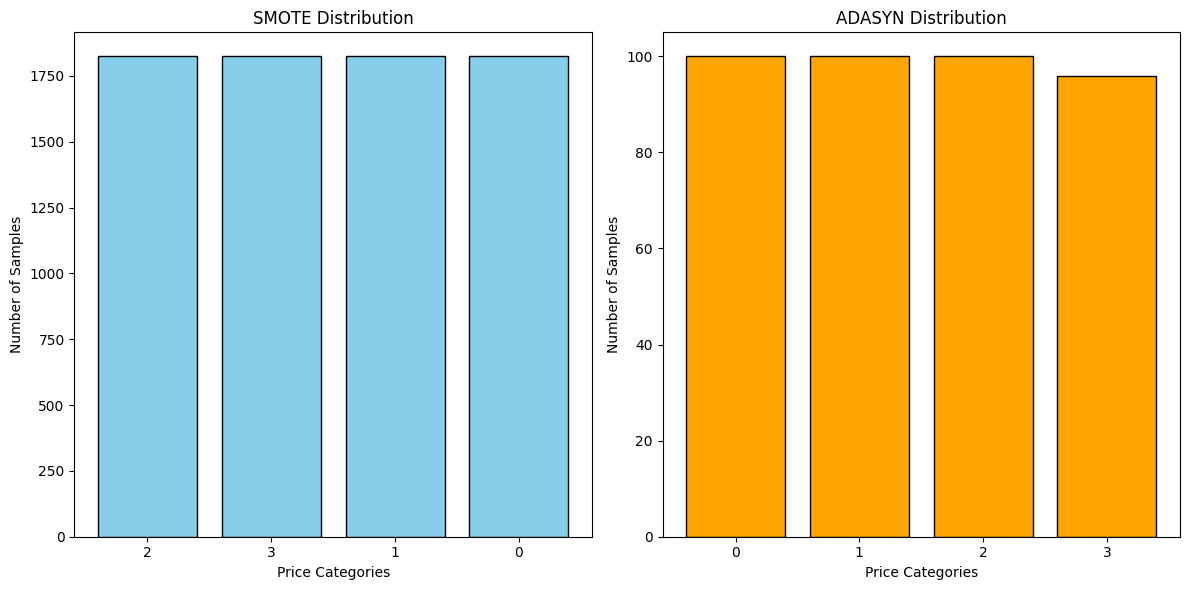


SMOTE Model Performance:
              precision    recall  f1-score   support

         Low       0.96      0.96      0.96       424
      Medium       0.98      0.98      0.98       376
        High       0.95      0.96      0.96       419
   Very High       0.98      0.97      0.97       345

    accuracy                           0.97      1564
   macro avg       0.97      0.97      0.97      1564
weighted avg       0.97      0.97      0.97      1564

SMOTE Accuracy: 0.97


ADASYN Model Performance:
              precision    recall  f1-score   support

         Low       0.83      0.88      0.85       424
      Medium       0.89      0.98      0.93       376
        High       0.88      0.79      0.83       419
   Very High       0.94      0.90      0.92       345

    accuracy                           0.88      1564
   macro avg       0.89      0.88      0.88      1564
weighted avg       0.88      0.88      0.88      1564

ADASYN Accuracy: 0.88


In [42]:
import pandas as pd
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import os

os.makedirs("Plots", exist_ok=True)

train_data = pd.read_csv('X_train_final_with_categories.csv')
test_data = pd.read_csv('X_test_final_with_categories.csv')

X_train = train_data.drop(columns=['Price', 'Price_Category'])
y_train = train_data['Price_Category']

X_test = test_data.drop(columns=['Price', 'Price_Category'])
y_test = test_data['Price_Category']

if y_train.dtype == 'object':
    y_train = y_train.astype('category').cat.codes
    y_test = y_test.astype('category').cat.codes

# Display initial distribution
print("Original Training Set Distribution:")
print(y_train.value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("\nSMOTE Distribution:")
print(pd.Series(y_train_smote).value_counts())

# Introduce artificial imbalance
undersampler = RandomUnderSampler(sampling_strategy={0: 100, 1: 100, 2: 100, 3: 50}, random_state=42)
X_train_imbalanced, y_train_imbalanced = undersampler.fit_resample(X_train, y_train)

print("\nImbalanced Training Set Distribution (Before ADASYN):")
print(pd.Series(y_train_imbalanced).value_counts())

# Apply ADASYN on imbalanced data
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_imbalanced, y_train_imbalanced)
print("\nADASYN Distribution:")
print(pd.Series(y_train_adasyn).value_counts())

# Visualize distributions
plt.figure(figsize=(12, 6))

# SMOTE
plt.subplot(1, 2, 1)
smote_counts = pd.Series(y_train_smote).value_counts()
plt.bar(smote_counts.index.astype(str), smote_counts.values, color='skyblue', edgecolor='black')
plt.title("SMOTE Distribution")
plt.xlabel("Price Categories")
plt.ylabel("Number of Samples")

# ADASYN
plt.subplot(1, 2, 2)
adasyn_counts = pd.Series(y_train_adasyn).value_counts()
plt.bar(adasyn_counts.index.astype(str), adasyn_counts.values, color='orange', edgecolor='black')
plt.title("ADASYN Distribution")
plt.xlabel("Price Categories")
plt.ylabel("Number of Samples")

plt.tight_layout()

output_path = "Plots/SMOTE_and_ADASYN_distribution.png"
plt.savefig(output_path, bbox_inches='tight')
plt.show()

# Train Decision Tree Classifier on SMOTE-balanced data
dt_smote = DecisionTreeClassifier(random_state=42)
dt_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = dt_smote.predict(X_test)

# Train Decision Tree Classifier on ADASYN-balanced data
dt_adasyn = DecisionTreeClassifier(random_state=42)
dt_adasyn.fit(X_train_adasyn, y_train_adasyn)
y_pred_adasyn = dt_adasyn.predict(X_test)

# Evaluate SMOTE model
print("\nSMOTE Model Performance:")
print(classification_report(y_test, y_pred_smote, target_names=['Low', 'Medium', 'High', 'Very High']))
print(f"SMOTE Accuracy: {accuracy_score(y_test, y_pred_smote):.2f}\n")

# Evaluate ADASYN model
print("\nADASYN Model Performance:")
print(classification_report(y_test, y_pred_adasyn, target_names=['Low', 'Medium', 'High', 'Very High']))
print(f"ADASYN Accuracy: {accuracy_score(y_test, y_pred_adasyn):.2f}")


Decision Tree R2 Score: 0.9919744920219057
Random Forest R2 Score: 0.9901227835291939

Decision Tree Mean Squared Error: 9375955139485.014
Random Forest Mean Squared Error: 11539249451378.717

Decision Tree Mean Absolute Error: 926342.7060719641
Random Forest Mean Absolute Error: 720445.4632352941


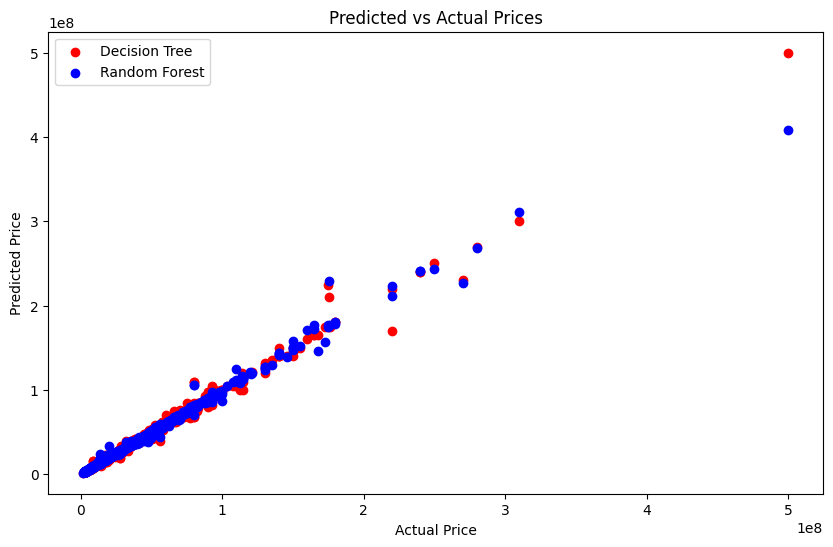

In [43]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import os

os.makedirs("Plots", exist_ok=True)

train_data = pd.read_csv('X_train_final_with_categories.csv')
test_data = pd.read_csv('X_test_final_with_categories.csv')
# train_data = pd.read_csv('../Q2/undersampled_train_data.csv')
# test_data = pd.read_csv('../Q2/undersampled_test_data.csv')
# train_data = pd.read_csv('../Q2/oversampled_train_data.csv')
# test_data = pd.read_csv('../Q2/oversampled_test_data.csv')

X_train = train_data.drop(columns=['Price', 'Price_Category'])
y_train = train_data['Price']

X_test = test_data.drop(columns=['Price', 'Price_Category'])
y_test = test_data['Price']

# Training Decision Tree on processed data using the Best Hyperparameters found in 2b
# `ccp_alpha` = 31941543.737055868 is the best hyperparameter
dt = DecisionTreeRegressor(
    random_state=42,
    max_depth=None,
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=2,
    ccp_alpha=31941543.737055868
)
dt.fit(X_train, y_train)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

dt_r2 = r2_score(y_test, dt_pred)
rf_r2 = r2_score(y_test, rf_pred)

dt_mse = mean_squared_error(y_test, dt_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

dt_mae = mean_absolute_error(y_test, dt_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)

print(f"\nDecision Tree R2 Score: {dt_r2}")
print(f"Random Forest R2 Score: {rf_r2}")

print(f"\nDecision Tree Mean Squared Error: {dt_mse}")
print(f"Random Forest Mean Squared Error: {rf_mse}")

print(f"\nDecision Tree Mean Absolute Error: {dt_mae}")
print(f"Random Forest Mean Absolute Error: {rf_mae}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_pred, c='red', label='Decision Tree')
plt.scatter(y_test, rf_pred, c='blue', label='Random Forest')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Prices')
plt.legend()

output_path = "Plots/predicted_vs_actual_prices.png"
plt.savefig(output_path, bbox_inches='tight')
plt.show()